<a href="https://colab.research.google.com/github/Tanmoy-Mandal/3D-Printing/blob/main/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary Files**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, f1_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# **Read dataset**

In [5]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3D printing/2025_02_04/2025_02_04_3D_printing.csv')
data.head()

,Material,Geometry,Print_speed(),Layer_thickness(mm),Infill_density(%),Infill_density(%).1,Wall_thickness,Measured_wall_thickness,Height,Measured_height,...,Volume,Measured_volume,Wall_T_deviation,Wall_T_deviation(%),Outer_D_deviation,Out_D_deviation(%),Height_deviation,Height_deviation(%),Volume_deviation,Volume_deviation(%)
0,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),2,2.195000,10,10.576667,...,1130.976,1280.004071,0.195000,9.750000,0.255000,1.275000,0.576667,5.766667,149.028071,13.176944
1,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),3,3.200000,10,10.740000,...,1602.216,1791.770594,0.200000,6.666667,0.205000,1.025000,0.740000,7.400000,189.554594,11.830776
2,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),4,4.265000,10,10.766667,...,2010.624,2275.007772,0.265000,6.625000,0.035000,0.175000,0.766667,7.666667,264.383772,13.149339
3,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),5,5.258333,10,10.783333,...,2356.200,2598.115568,0.258333,5.166667,0.156667,0.783333,0.783333,7.833333,241.915568,10.267192
4,ABS,ring,Normal,0.3,60,Semi_solid_honeycomb(60),2,2.095000,10,10.653333,...,1130.976,1240.010880,0.095000,4.750000,0.220000,1.100000,0.653333,6.533333,109.034880,9.640778


# **Column Name**

In [4]:
print(f'Data Shape: ', data.shape)
data.columns

Data Shape:  (28, 26)


Index(['Material', 'Geometry', 'Print_speed()', 'Layer_thickness(mm)',
       'Infill_density(%)', 'Infill_density(%).1', 'Wall_thickness',
       'Measured_wall_thickness', 'Height', 'Measured_height', 'Diameter',
       'Measured_diameter', 'Outer_radius', 'Measured_outer_r', 'Inner_radius',
       'Measured_inner_radius', 'Volume', 'Measured_volume',
       'Wall_T_deviation', 'Wall_T_deviation(%)', 'Outer_D_deviation',
       'Out_D_deviation(%)', 'Height_deviation', 'Height_deviation(%)',
       'Volume_deviation', 'Volume_deviation(%)'],
      dtype='object')

# **Data Information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Material                 28 non-null     object 
 1   Geometry                 28 non-null     object 
 2   Print_speed()            28 non-null     object 
 3   Layer_thickness(mm)      28 non-null     float64
 4   Infill_density(%)        28 non-null     int64  
 5   Infill_density(%).1      28 non-null     object 
 6   Wall_thickness           28 non-null     int64  
 7   Measured_wall_thickness  28 non-null     float64
 8   Height                   28 non-null     int64  
 9   Measured_height          28 non-null     float64
 10  Diameter                 28 non-null     int64  
 11  Measured_diameter        28 non-null     float64
 12  Outer_radius             28 non-null     int64  
 13  Measured_outer_r         28 non-null     float64
 14  Inner_radius             28 

# **Data Description**

In [7]:
data.describe()

,Layer_thickness(mm),Infill_density(%),Wall_thickness,Measured_wall_thickness,Height,Measured_height,Diameter,Measured_diameter,Outer_radius,Measured_outer_r,...,Volume,Measured_volume,Wall_T_deviation,Wall_T_deviation(%),Outer_D_deviation,Out_D_deviation(%),Height_deviation,Height_deviation(%),Volume_deviation,Volume_deviation(%)
count,28.00000,28.000000,28.00000,28.000000,28.000000,28.000000,28.0,28.000000,28.0,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.30000,54.285714,3.50000,3.590119,8.571429,9.209405,20.0,19.872321,10.0,9.936161,...,1521.432000,1658.394928,0.090119,2.957937,0.134702,0.673512,0.637976,8.016667,136.962928,9.739939
std,0.04714,26.024002,1.13855,1.136481,2.300219,2.343684,0.0,0.091111,0.0,0.045556,...,580.853346,610.245946,0.066551,2.293771,0.079938,0.399692,0.095290,2.416941,46.122873,3.067055
min,0.20000,20.000000,2.00000,2.065000,5.000000,5.470000,20.0,19.676667,10.0,9.838333,...,565.488000,626.861954,0.008333,0.166667,0.015000,0.075000,0.416667,4.166667,61.373954,3.854167
25%,0.30000,20.000000,2.75000,2.821250,5.000000,5.617500,20.0,19.795000,10.0,9.897500,...,1130.976000,1230.716698,0.047500,1.050000,0.081667,0.408333,0.581667,6.400000,108.210563,7.327808
50%,0.30000,60.000000,3.50000,3.607500,10.000000,10.626667,20.0,19.866667,10.0,9.933333,...,1602.216000,1685.556424,0.071667,2.284722,0.133333,0.666667,0.630000,7.366667,129.145610,9.108477
75%,0.35000,80.000000,4.25000,4.450833,10.000000,10.710833,20.0,19.918333,10.0,9.959167,...,2010.624000,2174.361724,0.100833,4.500000,0.205000,1.025000,0.710833,9.700000,158.751452,12.630220
max,0.35000,80.000000,5.00000,5.258333,10.000000,10.783333,20.0,20.043333,10.0,10.021667,...,2356.200000,2598.115568,0.265000,9.750000,0.323333,1.616667,0.783333,12.400000,264.383772,15.226374


# **Drop data Column**

In [8]:
df = data.drop(columns=['Material', 'Geometry', 'Print_speed()',
       'Infill_density(%).1',
         'Diameter', 'Measured_diameter',
       'Outer_radius', 'Measured_outer_r', 'Inner_radius',
       'Measured_inner_radius', 'Measured_volume','Measured_wall_thickness',
       'Wall_T_deviation', 'Wall_T_deviation(%)', 'Outer_D_deviation',
       'Out_D_deviation(%)',
       'Volume_deviation', 'Volume_deviation(%)', 'Height_deviation(%)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Layer_thickness(mm)  28 non-null     float64
 1   Infill_density(%)    28 non-null     int64  
 2   Wall_thickness       28 non-null     int64  
 3   Height               28 non-null     int64  
 4   Measured_height      28 non-null     float64
 5   Volume               28 non-null     float64
 6   Height_deviation     28 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 1.7 KB


# **New Data description**

In [9]:
df.describe()

,Layer_thickness(mm),Infill_density(%),Wall_thickness,Height,Measured_height,Volume,Height_deviation
count,28.00000,28.000000,28.00000,28.000000,28.000000,28.000000,28.000000
mean,0.30000,54.285714,3.50000,8.571429,9.209405,1521.432000,0.637976
std,0.04714,26.024002,1.13855,2.300219,2.343684,580.853346,0.095290
min,0.20000,20.000000,2.00000,5.000000,5.470000,565.488000,0.416667
25%,0.30000,20.000000,2.75000,5.000000,5.617500,1130.976000,0.581667
50%,0.30000,60.000000,3.50000,10.000000,10.626667,1602.216000,0.630000
75%,0.35000,80.000000,4.25000,10.000000,10.710833,2010.624000,0.710833
max,0.35000,80.000000,5.00000,10.000000,10.783333,2356.200000,0.783333


# **Correlation Heatmap of the 3D printing Dataset**

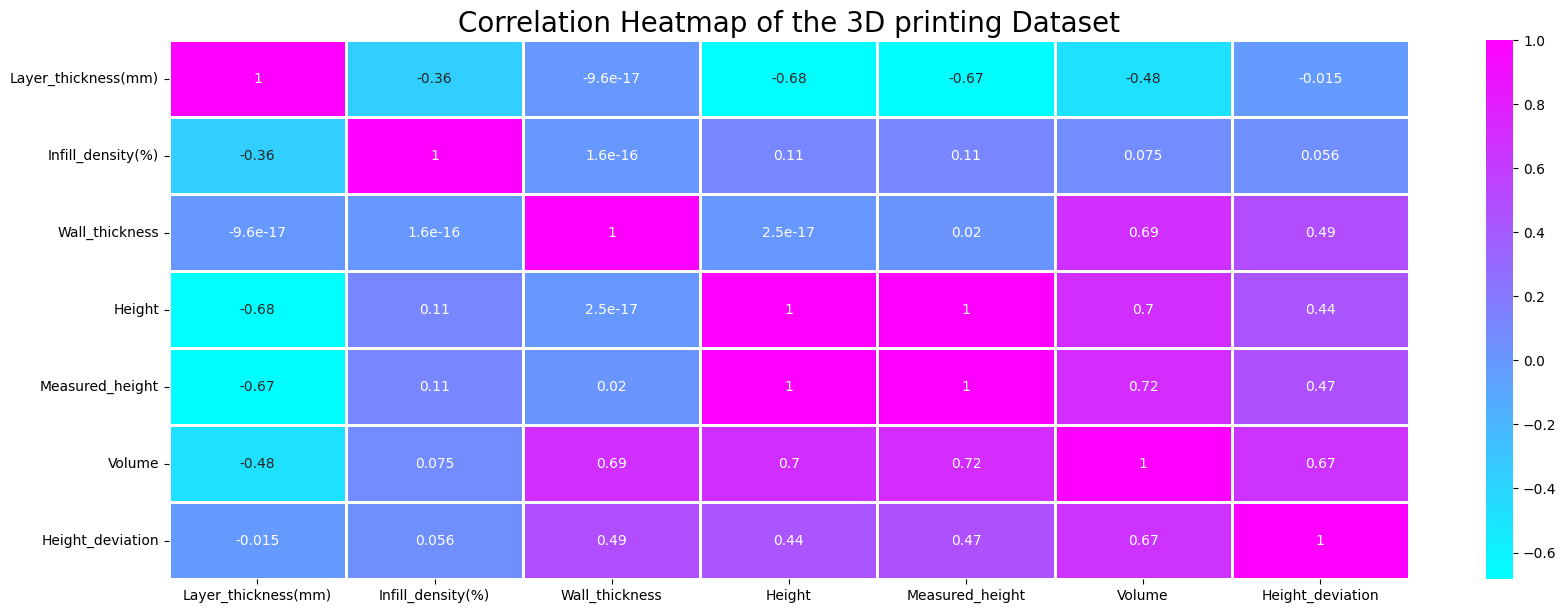

In [14]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space

fig, ax = plt.subplots(figsize = (20,7))

#Title for the heatmap
title = 'Correlation Heatmap of the 3D printing Dataset'
plt.title(title, fontsize = 20)
ttl = ax.title

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(df.corr(), cbar = True, cmap = 'cool', annot = True, linewidths = 1, ax = ax)

#enable visualization using .show() function of matplot
plt.show()

# **Split the dataset into training and testing sets**

In [15]:
# Convert data to DataFrame
df = pd.DataFrame(df)

# Features and target variable
# X = df.drop(columns=['Measured_height'])
# y = df['Measured_height']
X = df.drop(columns=['Measured_height'])
y = df['Measured_height']


# print("X : \n", X)
# print("y : \n", y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Evaluate the model's performance**

Mean Squared Error: 0.01
R^2 Score: 1.00
Actual_data: 
9     10.700000
25     5.570000
8     10.640000
21     5.610000
0     10.576667
12    10.600000
Name: Measured_height, dtype: float64
Predicted_data: 
[10.6986      5.61963333 10.5469      5.61826667 10.46863333 10.5095    ]


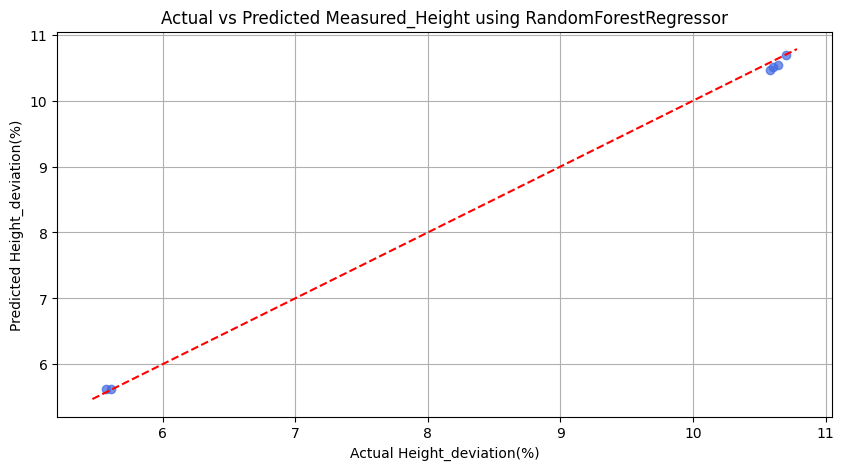

In [17]:
# Now, you can define the model
# model = LinearRegression()
# model = DecisionTreeRegressor(random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
# model = SVR(kernel='rbf')  # Using Radial Basis Function kernel
# model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
# model = GaussianNB()


# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Actual_data: \n{y_test}')
print(f'Predicted_data: \n{y_pred}')

# Plotting actual vs predicted Height_deviation(%)s
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# plt.title('Actual vs Predicted Measured_Height using LinearRegression')
# plt.title('Actual vs Predicted Measured_Height using DecisionTreeRegressor')
plt.title('Actual vs Predicted Measured_Height using RandomForestRegressor')
# plt.title('Actual vs Predicted Measured_Height using SVM')


plt.xlabel('Actual Height_deviation(%)')
plt.ylabel('Predicted Height_deviation(%)')
plt.grid()
plt.show()

# **New Data**

RandomForestRegressor
Index | Predicted | Actual
------------------------------
0     | 10.47     | 10.57666667
1     | 10.74     | 10.74
2     | 10.77     | 10.76666667
3     | 10.77     | 10.78333333
4     | 10.55     | 10.65333333
5     | 10.7      | 10.70333333
6     | 10.76     | 10.76666667
7     | 10.69     | 10.69333333
8     | 10.55     | 10.64
9     | 10.7      | 10.7
10    | 10.76     | 10.76
11    | 10.7      | 10.69666667
12    | 10.51     | 10.6
13    | 10.43     | 10.41666667
14    | 10.74     | 10.74
15    | 10.74     | 10.73333333
16    | 10.42     | 10.50666667
17    | 10.55     | 10.55
18    | 10.62     | 10.61333333
19    | 10.64     | 10.64
20    | 5.5       | 5.47
21    | 5.62      | 5.61
22    | 5.7       | 5.62
23    | 5.85      | 5.6
24    | 5.58      | 5.53
25    | 5.62      | 5.57
26    | 5.69      | 5.583333333
27    | 5.85      | 5.6


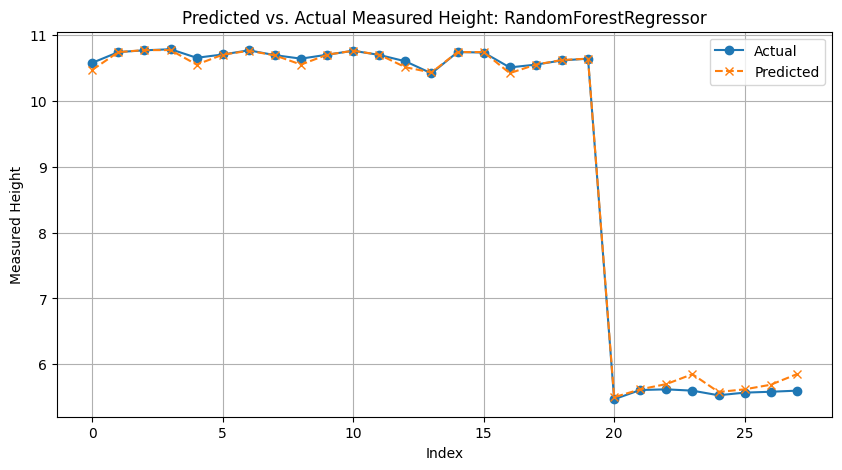

In [21]:
# new_data = pd.DataFrame({
#     'Layer_thickness(mm)': [.35],
#     'Infill_density(%)':[80],
#     'Wall_thickness':[5],
#     'Measured_wall_thickness':[5.14],
#     'Height' : [10],
#     'Volume':[2356],
#     'Height_deviation(%)':[12.0]
# })

# predicted_height = model.predict(new_data)

# Print with 2 decimal places
# print(f'Predicted measured_Height:\n{np.round(predicted_height, 2)}')
# print(f'\nActual measured_Height:\n{np.round(y, 2)}')

new_data = df.drop(columns=['Measured_height'])
# y = df['Measured_height']

# new_data = pd.DataFrame(X_train)
predicted_height = model.predict(new_data)

# Ensure both arrays have the same shape
predicted_height = np.round(predicted_height.flatten(), 2)  # Flatten if needed

# Print column-wise with index
# print("DecessionTreeRegressor")
print("RandomForestRegressor")
# print("LinearRegressor")
# print("SVM")
print("Index | Predicted | Actual")
print("-" * 30)
for idx, (pred, actual) in enumerate(zip(predicted_height, y)):
    print(f"{idx:<5} | {pred:<9} | {actual}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y, label="Actual", marker="o", linestyle="-")
plt.plot(predicted_height, label="Predicted", marker="x", linestyle="--")
plt.xlabel("Index")
plt.ylabel("Measured Height")
plt.title("Predicted vs. Actual Measured Height: RandomForestRegressor")
plt.legend()
plt.grid(True)
plt.show()